### Load in packages and model

In [1]:
%cd ../..

/home/nils/NILS/Master/DL2/DL2-ZeroVis


In [2]:
from src.fromage_inf.inf_utils import PromptParser
import pickle
import torch
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
# Load in the parser.
parser = PromptParser("src/fromage_inf/fromage_model/")

# Load the relations dictionary to make the relations.
relations_dict = pickle.load(open("src/code/relations_dict.pkl", "rb"))

Using facebook/opt-6.7b for the language model.
Freezing the LM.
Initializing embedding for the retrieval token [RET] (id = 50266).


# t-distributed Stochastic Neighbor Embedding

### Of the Visual Relations Benchmark images precomputed embeddings

In [4]:
# Load torch device.
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Initialize variables.
X = None
y = []

# Loop all precomputed visual embeddings of the benchmark.
for key, emb in parser.model.visual_embs.items():

    # Stack the embeddings.
    if type(X) == torch.Tensor:
        X = torch.vstack((X, emb))
    else:
        X = emb
    
    # Save the category the image belongs to.
    y.append(key.split('/')[0])

# Process the stacked embeddings.
X = torch.tensor(X, dtype=torch.float16)
X = torch.squeeze(X)
X = X.detach().cpu().numpy()

/tmp/ipykernel_33360/4085370293.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float16)


[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 74 / 74
[t-SNE] Mean sigma: 39.526697
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.634495
[t-SNE] KL divergence after 275 iterations: 0.174651


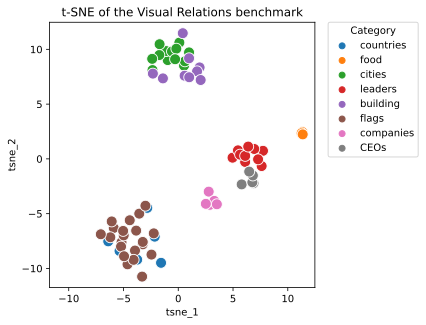

In [11]:
# Set the t-SNE and fit the stacked embeddings.
tsne = TSNE(n_components=2,  perplexity=20, n_iter=275, verbose=True, method='exact')
tsne_result = tsne.fit_transform(X)

# Plot the result of our TSNE with the label color coded.
# A lot of the stuff here is about making the plot look pretty and not TSNE.
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120).set(title='t-SNE of the Visual Relations benchmark')
lim = (tsne_result.min()-1, tsne_result.max()+1)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)